In [2]:
from graph_tool import (
    Graph,
    VertexPropertyMap,
    util,
    draw,
    inference,
    load_graph,
    clustering,
    stats,
    centrality,
    topology,
)
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
g: Graph = load_graph("../visualization/graph.gt.gz")

### Degree Distribution


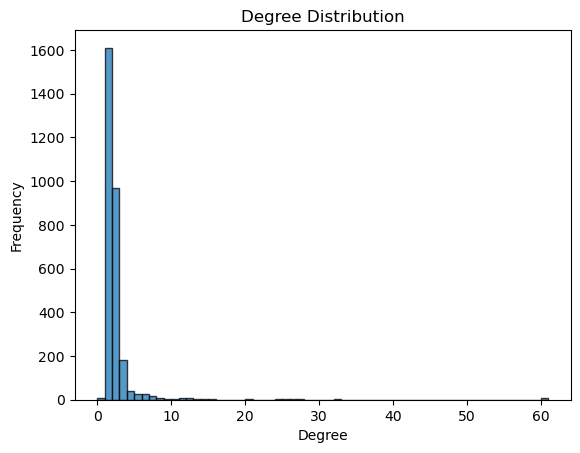

In [10]:
degree_property_map = g.degree_property_map(
    "total"
)  # 'total' for undirected graphs, 'in' or 'out' for directed graphs

# Extract the degrees into a list or a numpy array
degrees = degree_property_map.a

# Plot the degree distribution as a histogram
plt.hist(
    degrees, bins=range(min(degrees), max(degrees) + 1), alpha=0.75, edgecolor="black"
)

plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Clustering Coefficient


In [5]:
clustering_coefficient = clustering.local_clustering(g)
average_clustering_coefficient = np.mean(clustering_coefficient.a)
print(f"Average Clustering Coefficient: {average_clustering_coefficient}")

Average Clustering Coefficient: 0.016083645196771388


### PageRank


In [6]:
pagerank_map = centrality.pagerank(g)
print(f"PageRank: {pagerank_map.a}")

PageRank: [0.00020181 0.00020181 0.00020181 ... 0.00020926 0.00038383 0.00041169]


### Diameter


In [7]:
_, diameter = topology.pseudo_diameter(g)
print(f"Diameter: {diameter}")

Diameter: (<Vertex object with index '0' at 0x103930a40>, <Vertex object with index '2245' at 0x103930f40>)


### Closeness


In [8]:
closeness_map = centrality.closeness(g)
print(f"Closeness: {closeness_map.a}")

Closeness: [0.57051282 1.         1.         ...        nan        nan        nan]


### Betweenness


In [9]:
vertex_betweenness, edge_betweenness = centrality.betweenness(g)
print(f"Vertex Betweenness: {vertex_betweenness.a}")
print(f"Edge Betweenness: {edge_betweenness.a}")

Vertex Betweenness: [0. 0. 0. ... 0. 0. 0.]
Edge Betweenness: [4.58549320e-07 1.03173597e-06 4.58549320e-07 ... 1.14637330e-07
 1.37564796e-06 1.71955995e-06]
